![image info](https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/images/banner_1.png)

# Proyecto 1 - Predicción de precios de vehículos usados

En este proyecto podrán poner en práctica sus conocimientos sobre modelos predictivos basados en árboles y ensambles, y sobre la disponibilización de modelos. Para su desasrrollo tengan en cuenta las instrucciones dadas en la "Guía del proyecto 1: Predicción de precios de vehículos usados".

**Entrega**: La entrega del proyecto deberán realizarla durante la semana 4. Sin embargo, es importante que avancen en la semana 3 en el modelado del problema y en parte del informe, tal y como se les indicó en la guía.

Para hacer la entrega, deberán adjuntar el informe autocontenido en PDF a la actividad de entrega del proyecto que encontrarán en la semana 4, y subir el archivo de predicciones a la [competencia de Kaggle](https://www.kaggle.com/t/b8be43cf89c540bfaf3831f2c8506614).

## Datos para la predicción de precios de vehículos usados

En este proyecto se usará el conjunto de datos de Car Listings de Kaggle, donde cada observación representa el precio de un automóvil teniendo en cuenta distintas variables como: año, marca, modelo, entre otras. El objetivo es predecir el precio del automóvil. Para más detalles puede visitar el siguiente enlace: [datos](https://www.kaggle.com/jpayne/852k-used-car-listings).

## Ejemplo predicción conjunto de test para envío a Kaggle

En esta sección encontrarán el formato en el que deben guardar los resultados de la predicción para que puedan subirlos a la competencia en Kaggle.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación librerías
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
# Carga de datos de archivo .csv
dataTraining = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/dataTrain_carListings.zip')
dataTesting = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/dataTest_carListings.zip', index_col=0)

In [4]:
# Visualización datos de entrenamiento
dataTraining.head()

,Price,Year,Mileage,State,Make,Model
0,34995,2017,9913,FL,Jeep,Wrangler
1,37895,2015,20578,OH,Chevrolet,Tahoe4WD
2,18430,2012,83716,TX,BMW,X5AWD
3,24681,2014,28729,OH,Cadillac,SRXLuxury
4,26998,2013,64032,CO,Jeep,Wrangler


In [5]:
# Visualización datos de test
dataTesting.head()

,Year,Mileage,State,Make,Model
ID,,,,,
0,2014,31909,MD,Nissan,MuranoAWD
1,2017,5362,FL,Jeep,Wrangler
2,2014,50300,OH,Ford,FlexLimited
3,2004,132160,WA,BMW,5
4,2015,25226,MA,Jeep,Grand


In [6]:
# Predicción del conjunto de test - acá se genera un número aleatorio como ejemplo
np.random.seed(42)
y_pred = pd.DataFrame(np.random.rand(dataTesting.shape[0]) * 75000 + 5000, index=dataTesting.index, columns=['Price'])

In [7]:
# Guardar predicciones en formato exigido en la competencia de kaggle
y_pred.to_csv('test_submission.csv', index_label='ID')
y_pred.head()

,Price
ID,
0,33090.508914
1,76303.572981
2,59899.545636
3,49899.386315
4,16701.398033


### Analisis exploratorio.

#### Variable de respuesta

In [8]:
## Variables de respuesta
dataTraining["Price"].describe()

count    400000.000000
mean      21146.919312
std       10753.664940
min        5001.000000
25%       13499.000000
50%       18450.000000
75%       26999.000000
max       79999.000000
Name: Price, dtype: float64

In [9]:
import matplotlib.pyplot as plt

(array([229538., 128888.,  34260.,   6349.,    965.]),
 array([ 5001. , 20000.6, 35000.2, 49999.8, 64999.4, 79999. ]),
 <BarContainer object of 5 artists>)

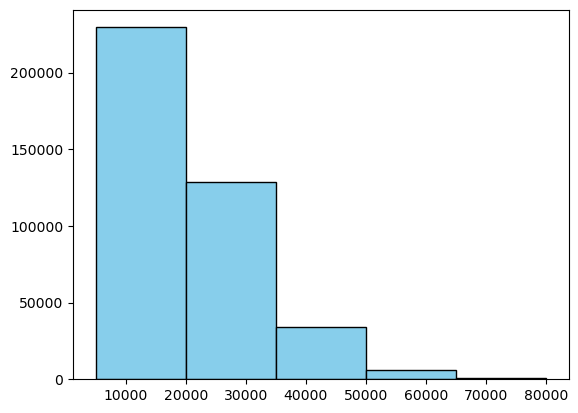

In [10]:
## Histograma Variable de respuesta
plt.hist(dataTraining["Price"], bins=5, color='skyblue', edgecolor='black')

{'whiskers': [<matplotlib.lines.Line2D at 0x1b002438460>,
 'caps': [<matplotlib.lines.Line2D at 0x1b002438910>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b0024381c0>],
 'medians': [<matplotlib.lines.Line2D at 0x1b002438e50>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b0024390f0>],
 'means': []}

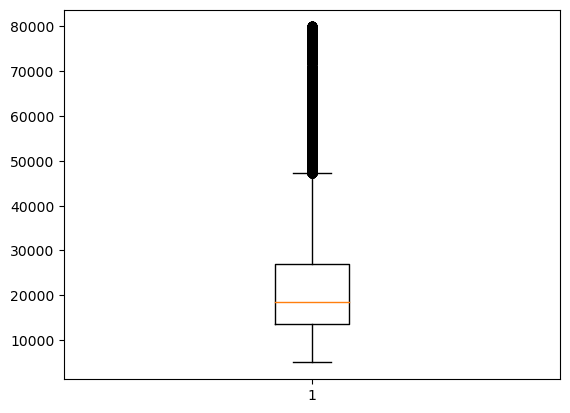

In [11]:
#Box plot var respuesta
plt.boxplot(dataTraining["Price"])

#### Variables Categoricas

Text(0.5, 1.0, 'Distribución de Años en los Datos de Entrenamiento')

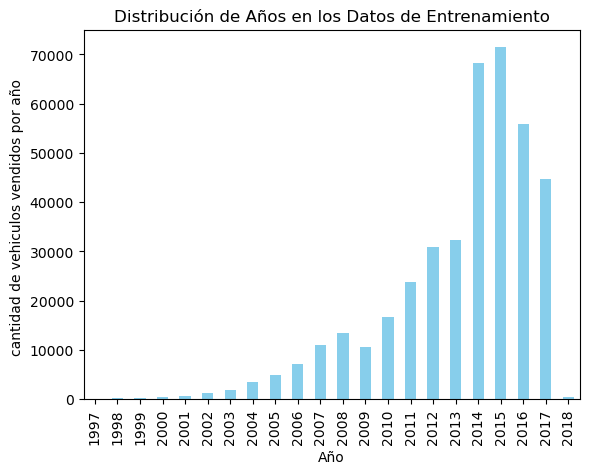

In [12]:
#Año
dataTraining["Year"].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.xlabel('Año')
plt.ylabel('cantidad de vehiculos vendidos por año ')
plt.title('Distribución de Años en los Datos de Entrenamiento')

Text(0.5, 1.0, 'Distribución de los estados en los Datos de Entrenamiento')

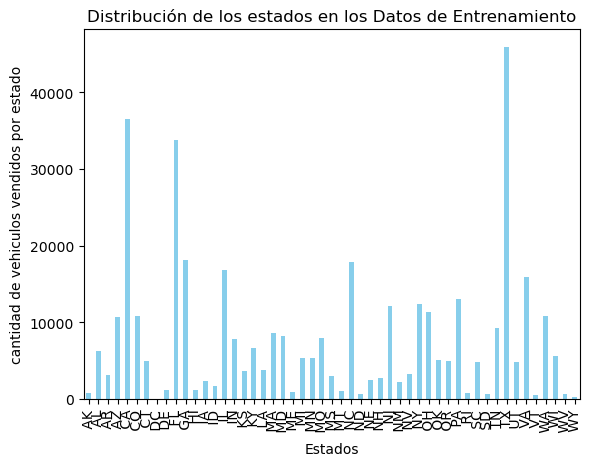

In [13]:
#Estado
dataTraining["State"].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.xlabel("Estados")
plt.ylabel('cantidad de vehiculos vendidos por estado')
plt.title('Distribución de los estados en los Datos de Entrenamiento')

In [14]:
len(dataTraining["State"].unique())

51

Text(0.5, 1.0, 'Distribución de las marcas en los Datos de Entrenamiento')

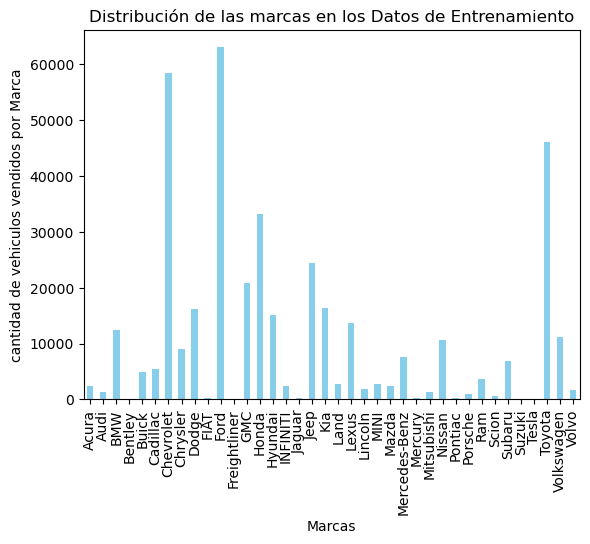

In [15]:
#Marcas
dataTraining["Make"].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.xlabel("Marcas")
plt.ylabel('cantidad de vehiculos vendidos por Marca')
plt.title('Distribución de las marcas en los Datos de Entrenamiento')

In [16]:
len(dataTraining["Make"].unique())

38

Text(0.5, 1.0, 'Distribución de las modelos en los Datos de Entrenamiento')

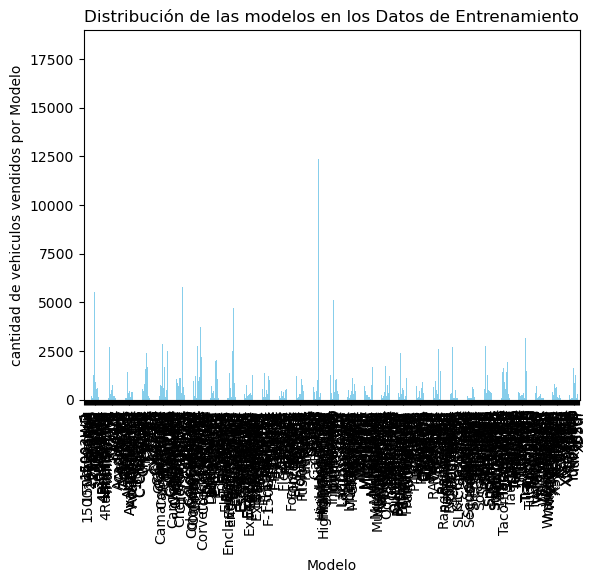

In [17]:
#Modelo
dataTraining["Model"].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.xlabel("Modelo")
plt.ylabel('cantidad de vehiculos vendidos por Modelo')
plt.title('Distribución de las modelos en los Datos de Entrenamiento')

In [18]:
len(dataTraining["Model"].unique())

525

In [19]:
dataTraining["Mileage"].describe()

count    4.000000e+05
mean     5.507296e+04
std      4.088102e+04
min      5.000000e+00
25%      2.584100e+04
50%      4.295500e+04
75%      7.743300e+04
max      2.457832e+06
Name: Mileage, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x1b007e6ae60>,
 'caps': [<matplotlib.lines.Line2D at 0x1b007e6b3a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b007e6abc0>],
 'medians': [<matplotlib.lines.Line2D at 0x1b007e6b8e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b007e6bb80>],
 'means': []}

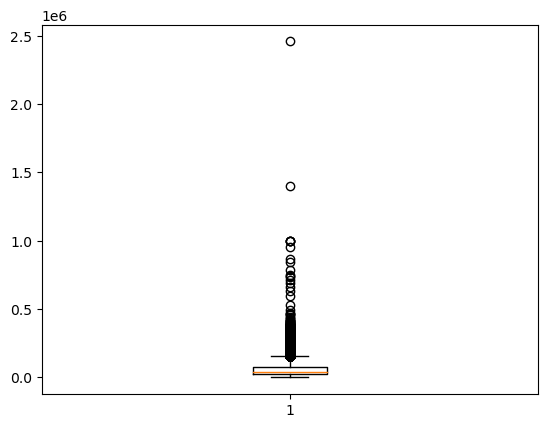

In [20]:
plt.boxplot(dataTraining["Mileage"])

(array([3.99456e+05, 5.24000e+02, 8.00000e+00, 6.00000e+00, 4.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([5.0000000e+00, 2.4578770e+05, 4.9157040e+05, 7.3735310e+05,
        9.8313580e+05, 1.2289185e+06, 1.4747012e+06, 1.7204839e+06,
        1.9662666e+06, 2.2120493e+06, 2.4578320e+06]),
 <BarContainer object of 10 artists>)

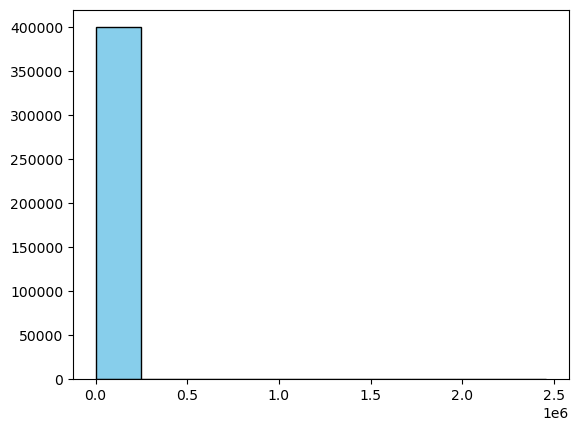

In [21]:
## Histograma Mileage
plt.hist(dataTraining["Mileage"], bins=10, color='skyblue', edgecolor='black')

# Preprocesamiento de datos




In [22]:
#Identificación de valores faltantes
missing_values = dataTraining.isnull().sum()
print("Valores faltantes por columna:\n", missing_values)


Valores faltantes por columna:
 Price      0
Year       0
Mileage    0
State      0
Make       0
Model      0
dtype: int64


In [23]:
dataTraining.columns

Index(['Price', 'Year', 'Mileage', 'State', 'Make', 'Model'], dtype='object')

In [24]:
dataTraining.describe()

,Price,Year,Mileage
count,400000.000000,400000.000000,4.000000e+05
mean,21146.919312,2013.198125,5.507296e+04
std,10753.664940,3.292326,4.088102e+04
min,5001.000000,1997.000000,5.000000e+00
25%,13499.000000,2012.000000,2.584100e+04
50%,18450.000000,2014.000000,4.295500e+04
75%,26999.000000,2016.000000,7.743300e+04
max,79999.000000,2018.000000,2.457832e+06


In [25]:
var_res= ['Price']
YTotal = dataTraining[var_res]

predictoras=['Year', 'Mileage', 'State', 'Make', 'Model']
XTotal = dataTraining[predictoras]

In [26]:
# División de los datos en conjunto de entrenamiento y validación
Xtrain, Xval, ytrain, yval = train_test_split(XTotal, YTotal, test_size=0.2, random_state=42)

In [27]:
#Escalando el año y el mileage
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


# Lista de características numéricas
numeric_features = Xtrain.select_dtypes(include=[np.number]).columns.tolist()

# Definir transformador para características numéricas
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Definir preprocesador para todas las características
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ],
    remainder='passthrough'  # Mantener las características no transformadas
)

# Aplicar las transformaciones al conjunto de entrenamiento
Xtrain_escalado = preprocessor.fit_transform(Xtrain)
Xval_escalado = preprocessor.fit_transform(Xval)

In [28]:
Xval_escalado

array([[0.24714360130801957, -0.3079077148882582, ' NM', 'Hyundai',
        'ElantraLimited'],
       [-0.9692265180214926, 1.0996706330004073, ' WA', 'GMC', 'Sierra'],
       [-1.2733190478538707, -0.3123966538799303, ' OR', 'Dodge',
        'Grand'],
       ...,
       [-0.6651339881891146, 0.8277445210048837, ' OR', 'Ford',
        'F-150XLT'],
       [-0.6651339881891146, 0.7573273736355214, ' OR', 'INFINITI',
        'G37'],
       [0.5512361311403976, -0.723874506616558, ' UT', 'Ford',
        'F-150XLT']], dtype=object)

In [29]:
Xtrain_escalado

array([[0.24266472102877507, -0.34543697217255376, ' TX', 'Dodge',
        'ChallengerR/T'],
       [-0.06098406257754461, 0.42637313014423833, ' AZ', 'Ford',
        'FusionSE'],
       [0.8499622882414144, 1.1623963579948755, ' WI', 'Dodge', 'Grand'],
       ...,
       [0.8499622882414144, -0.31353148450047713, ' TN', 'Ford',
        'FocusSE'],
       [0.24266472102877507, -0.4423984083114126, ' MA', 'Hyundai',
        'Elantra4dr'],
       [0.5463135046350948, -0.25218604416388296, ' TX', 'GMC', 'Sierra']],
      dtype=object)

In [30]:
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()

dataTraining['State_encoded'] = label_encoder.fit_transform(dataTraining['State'])

print(dataTraining[['State', 'State_encoded']].head())


  State  State_encoded
0    FL              9
1    OH             35
2    TX             43
3    OH             35
4    CO              5


In [31]:
dataTesting['State_encoded'] = label_encoder.transform(dataTesting['State'])

print(dataTesting[['State', 'State_encoded']].head())

   State  State_encoded
ID                     
0     MD             20
1     FL              9
2     OH             35
3     WA             47
4     MA             19


In [32]:
dataTraining['Make_encoded'] = label_encoder.fit_transform(dataTraining['Make'])

print(dataTraining[['Make', 'Make_encoded']].head())

        Make  Make_encoded
0       Jeep            17
1  Chevrolet             6
2        BMW             2
3   Cadillac             5
4       Jeep            17


In [33]:
dataTesting['Make_encoded'] = label_encoder.transform(dataTesting['Make'])

print(dataTesting[['Make', 'Make_encoded']].head())

      Make  Make_encoded
ID                      
0   Nissan            27
1     Jeep            17
2     Ford            10
3      BMW             2
4     Jeep            17


In [34]:
dataTraining['Model_encoded'] = label_encoder.fit_transform(dataTraining['Model'])

print(dataTraining[['Model', 'Model_encoded']].head())

       Model  Model_encoded
0   Wrangler            489
1   Tahoe4WD            448
2      X5AWD            499
3  SRXLuxury            398
4   Wrangler            489


In [35]:
dataTesting['Model_encoded'] = label_encoder.transform(dataTesting['Model'])

print(dataTesting[['Model', 'Model_encoded']].head())

          Model  Model_encoded
ID                            
0     MuranoAWD            305
1      Wrangler            489
2   FlexLimited            211
3             5             27
4         Grand            248


## División de datos en conjunto de entrenamiento y validación con preprocesamiento variables categoricas con label encoding y estandarización

In [36]:
# Recordar que YTotal y XTotal fueron los dataframe iniciales y que Xtrain_escalado y Xval_escalado tiene las variables Year y Mileage escaladas, y las categóricas sin transformación.
var_res2= ['Price']
YTotal2 = dataTraining[var_res2]

predictoras2=['Year', 'Mileage','State_encoded', 'Make_encoded', 'Model_encoded']
XTotal2 = dataTraining[predictoras2]

In [37]:
### data_Test sera la que se usara para las predicciones finales.
data_test = dataTesting[['Year', 'Mileage','State_encoded', 'Make_encoded', 'Model_encoded']]
data_test

,Year,Mileage,State_encoded,Make_encoded,Model_encoded
ID,,,,,
0,2014,31909,20,27,305
1,2017,5362,9,17,489
2,2014,50300,35,10,211
3,2004,132160,47,2,27
4,2015,25226,19,17,248
...,...,...,...,...,...
99995,2015,82719,43,12,401
99996,2015,19711,44,2,27
99997,2016,48049,4,27,305


In [38]:
# División de los datos en conjunto de entrenamiento y validación
Xtrain2, Xval2, ytrain2, yval2 = train_test_split(XTotal2, YTotal2, test_size=0.2, random_state=42)

In [39]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


# Lista de características numéricas
numeric_features = Xtrain2.select_dtypes(include=[np.number]).columns.tolist()

# Definir transformador para características numéricas
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Definir preprocesador para todas las características
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ],
    remainder='passthrough'  # Mantener las características no transformadas
)

# Aplicar las transformaciones al conjunto de entrenamiento
Xtrain_escalado2 = preprocessor.fit_transform(Xtrain2)
Xval_escalado2 = preprocessor.fit_transform(Xval2)

In [40]:
Xval_escalado2


array([[ 0.2471436 , -0.30790771,  0.52250501, -0.18150437, -0.70277285],
       [-0.96922652,  1.09967063,  1.50104296, -0.37614451,  1.0893209 ],
       [-1.27331905, -0.31239665,  0.84868433, -0.7654248 , -0.04252778],
       ...,
       [-0.66513399,  0.82774452,  0.84868433, -0.57078466, -0.3861247 ],
       [-0.66513399,  0.75732737,  0.84868433, -0.0841843 , -0.12337412],
       [ 0.55123613, -0.72387451,  1.30533537, -0.57078466, -0.3861247 ]])

# Modelos

Bagging

In [83]:
import numpy as np
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error


n_features = Xtrain_escalado2.shape[1]
max_features = int(np.log(n_features))

bagging_model = BaggingRegressor(n_estimators=200, max_features=5, random_state=42)
bagging_model.fit(Xtrain_escalado2, ytrain2)
y_pred_bagging = bagging_model.predict(Xval_escalado2)

# Métricas de desempeño para el modelo Bagging
mse_bagging = mean_squared_error(yval2, y_pred_bagging)
rmse_bagging = np.sqrt(mean_squared_error(yval2, y_pred_bagging))
r2_bagging = r2_score(yval2, y_pred_bagging)
mae_bagging = mean_absolute_error(yval2, y_pred_bagging)

print(f"Resultados del modelo Bagging:\nRMSE: {rmse_bagging:.2f}, R^2: {r2_bagging:.2f}, MAE: {mae_bagging:.2f}")

Resultados del modelo Bagging:
RMSE: 4938.42, R^2: 0.79, MAE: 3036.18


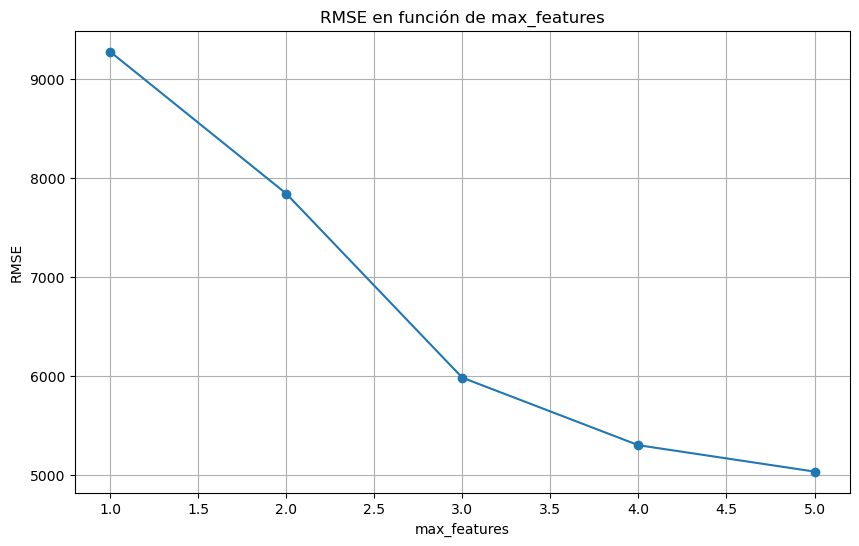

In [80]:
import matplotlib.pyplot as plt

# Lista de valores para max_features
max_features_values = list(range(1, n_features + 1))

# Listas para almacenar los valores de RMSE
rmse_values = []

# Itera sobre los valores de max_features para obtener los RMSE
for mf in max_features_values:
    bagging_model = BaggingRegressor(n_estimators=10, max_features=mf, random_state=42)
    bagging_model.fit(Xtrain_escalado2, ytrain2)
    y_pred_bagging = bagging_model.predict(Xval_escalado2)
    rmse = np.sqrt(mean_squared_error(yval2, y_pred_bagging))
    rmse_values.append(rmse)

# Crea el gráfico de líneas
plt.figure(figsize=(10, 6))
plt.plot(max_features_values, rmse_values, marker='o', linestyle='-')
plt.xlabel('max_features')
plt.ylabel('RMSE')
plt.title('RMSE en función de max_features')
plt.grid(True)
plt.show()


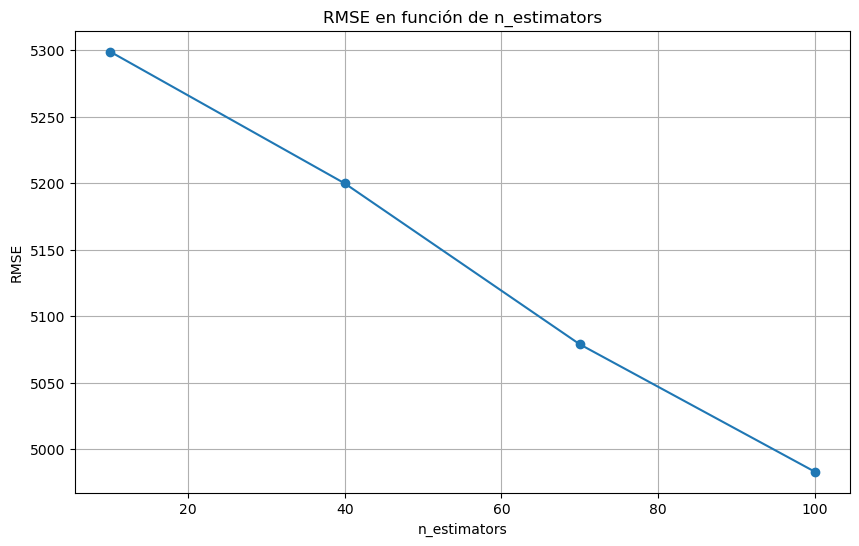

In [82]:
import matplotlib.pyplot as plt

# Lista de valores para n_estimators
n_estimators_values = list(range(10, 101, 30))

# Listas para almacenar los valores de RMSE
rmse_values = []

# Itera sobre los valores de n_estimators para obtener los RMSE
for ne in n_estimators_values:
    bagging_model = BaggingRegressor(n_estimators=ne, max_features=4, random_state=42)
    bagging_model.fit(Xtrain_escalado2, ytrain2)
    y_pred_bagging = bagging_model.predict(Xval_escalado2)
    rmse = np.sqrt(mean_squared_error(yval2, y_pred_bagging))
    rmse_values.append(rmse)

# Crea el gráfico de líneas
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_values, rmse_values, marker='o', linestyle='-')
plt.xlabel('n_estimators')
plt.ylabel('RMSE')
plt.title('RMSE en función de n_estimators')
plt.grid(True)
plt.show()


Random forest

In [44]:
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model.fit(Xtrain2, ytrain2)
y_pred_rf = random_forest_model.predict(Xval2)

# Métricas de desempeño para el modelo Random Forest
rmse_rf = np.sqrt(mean_squared_error(yval2, y_pred_rf))
r2_rf = r2_score(yval2, y_pred_rf)
mae_rf = mean_absolute_error(yval2, y_pred_rf)

print(f"Resultados del modelo Random Forest:\nRMSE: {rmse_rf:.2f}, R^2: {r2_rf:.2f}, MAE: {mae_rf:.2f}")

Resultados del modelo Random Forest:
RMSE: 3741.72, R^2: 0.88, MAE: 2344.13


XGBoost

In [47]:
from sklearn import metrics
from xgboost import XGBRegressor
XGB = XGBRegressor(n_estimators=100, max_depth=None, learning_rate=0.1)
XGB

XGB.fit(Xtrain2, ytrain2)

y_pred_XGB = XGB.predict(Xval2)



rmse_XGB = np.sqrt(metrics.mean_squared_error(yval2, y_pred_XGB))
mae_XGB = metrics.mean_absolute_error(yval2, y_pred_XGB)
r2_XGB = metrics.r2_score(yval2, y_pred_XGB)

print(f"Resultados del modelo XGBoosting:\nRMSE: {rmse_XGB:.2f}, R^2: {r2_XGB:.2f}, MAE: {mae_XGB:.2f}")

Resultados del modelo XGBoosting:
RMSE: 4374.91, R^2: 0.83, MAE: 2905.68


In [48]:
import joblib

import os
os.chdir('..')

In [49]:
from xgboost import XGBRegressor
from sklearn import metrics
import joblib

# Tu proceso de entrenamiento del modelo
XGB = XGBRegressor(n_estimators=100, max_depth=None, learning_rate=0.1)
XGB.fit(Xtrain2, ytrain2)

# Guardar el modelo entrenado, no las predicciones
joblib.dump(XGB, 'priceAutos.pkl', compress=3)


['priceAutos.pkl']

**Aca Calibro el Random Forest, pero este modelo no arroja buenos resultados al cargar las predicciones a pesar de que da un mse en datos de validación muy parecido al de XG boost. No ejecuten esta celda porque se demora mucho y el resultado final basicamente es que el mejor es el random forest con 200 estimadores**

In [ ]:
from sklearn.model_selection import cross_val_score
# Creación de lista de valores para iterar sobre diferentes valores de n_estimators
estimator_range = range(10, 310, 10)

# Definición de lista para almacenar la exactitud (accuracy) promedio para cada valor de n_estimators
accuracy_scores = []
predicciones= []

# Uso de un 5-fold cross-validation para cada valor de n_estimators
for estimator in estimator_range:
    clf = RandomForestRegressor(n_estimators=estimator, random_state=1, n_jobs=-1)
    clf.fit(Xtrain2, ytrain2)
    prediccion = clf.predict(Xval2)
    predicciones.append(mean_squared_error(yval2, prediccion))
    print(estimator)

In [ ]:
plt.plot(estimator_range, RMSE)
plt.xlabel('n_estimators')
plt.ylabel("MSE")

In [ ]:
RMSE=[]
for i in range(0,len(predicciones)):
    RMSE.append(predicciones[i]**(1/2))
    print(estimator_range[i], RMSE[i])


In [51]:
random_forest_model = RandomForestRegressor(n_estimators=200, random_state=42,n_jobs=-1)
random_forest_model.fit(Xtrain2, ytrain2)
y_pred_rf = random_forest_model.predict(Xval2)

# Métricas de desempeño para el modelo Random Forest
rmse_rf = np.sqrt(mean_squared_error(yval2, y_pred_rf))
r2_rf = r2_score(yval2, y_pred_rf)
mae_rf = mean_absolute_error(yval2, y_pred_rf)

print(f"Resultados del modelo Random Forest:\nRMSE: {rmse_rf:.2f}, R^2: {r2_rf:.2f}, MAE: {mae_rf:.2f}")

Resultados del modelo Random Forest:
RMSE: 3735.84, R^2: 0.88, MAE: 2340.57


In [ ]:
ypred = random_forest_model.predict(data_test)

In [ ]:
predicciones_rf_kaggle=random_forest_model.predict(data_test)
predicciones_rf_kaggle_file = pd.DataFrame({
    'ID': range(0, len(predicciones_rf_kaggle) ),  # Números de observación empezando desde 1
    'Price': predicciones_rf_kaggle  # Predicciones del año redondeadas
})
# Guardar el DataFrame en un archivo CSV sin incluir el índice de fila
predicciones_rf_kaggle_file.to_csv('predicciones_rf_kaggle_file.csv', index=False)

print('Predicciones guardadas en predicciones_rf_kaggle_file.csv')

### **XG BOOST SIN CALIBRAR**

In [52]:
from sklearn import metrics
from xgboost import XGBRegressor
XGB = XGBRegressor(n_estimators=200, max_depth=None, learning_rate=0.1)
XGB

XGB.fit(Xtrain2, ytrain2)

y_pred_XGB = XGB.predict(Xval2)



rmse_XGB = np.sqrt(metrics.mean_squared_error(yval2, y_pred_XGB))
mae_XGB = metrics.mean_absolute_error(yval2, y_pred_XGB)
r2_XGB = metrics.r2_score(yval2, y_pred_XGB)

print(f"Resultados del modelo XGBoosting:\nRMSE: {rmse_XGB:.2f}, R^2: {r2_XGB:.2f}, MAE: {mae_XGB:.2f}")

Resultados del modelo XGBoosting:
RMSE: 4028.47, R^2: 0.86, MAE: 2636.73


In [ ]:
predicciones_xg_kaggle=XGB.predict(data_test)
predicciones_xg_kaggle_file = pd.DataFrame({
    'ID': range(0, len(predicciones_xg_kaggle) ),  # Números de observación empezando desde 1
    'Price': predicciones_xg_kaggle  # Predicciones del año redondeadas
})
# Guardar el DataFrame en un archivo CSV sin incluir el índice de fila
predicciones_xg_kaggle_file.to_csv('predicciones_xg200_kaggle_file.csv', index=False)

print('Predicciones guardadas en predicciones_rf_kaggle_file.csv')

### Calibrando XG Boost

In [ ]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# Define el modelo
model = xgb.XGBRegressor()

# Define los hiperparámetros para la búsqueda en cuadrícula
param_grid = {
    'n_estimators': [300,350, 400],
    'learning_rate': [0.2,0.3,0.4],
    'gamma': [0],
    'colsample_bytree': [0.7, 1.0, 1.3],
    'max_depth': [7, 10, 13]}

# Realiza la búsqueda en cuadrícula
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3,  verbose=2)
grid_search.fit(Xtrain2, ytrain2)

# Muestra los mejores hiperparámetros
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)

# Obtiene el mejor modelo
best_model = grid_search.best_estimator_


In [ ]:
best_xgb = grid_search.best_estimator_
y_pred_XGB = best_xgb.predict(Xval2)

rmse_XGB = np.sqrt(metrics.mean_squared_error(yval2,y_pred_XGB))
mae_XGB = metrics.mean_absolute_error(yval2, y_pred_XGB)
r2_XGB = metrics.r2_score(yval2, y_pred_XGB)
print(f"Resultados del modelo XGBoosting:\nRMSE: {rmse_XGB:.2f}, R^2: {r2_XGB:.2f}, MAE: {mae_XGB:.2f}")

**Los parametros que se muestran a continuación son los que bota el gridsearchCV, entonces reemplazar en el xgboost estos parametros para que se les ejecute el modelo con mejor RMSE. Si ejecutan el grid search Cv se les puede demorar alrededor de 10-30 min**

In [ ]:
{'colsample_bytree': 0.7, 'gamma': 0, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 400}

In [ ]:
predicciones_xg_calibrado_kaggle= best_xgb.predict(data_test)
predicciones_xg_calibrado_kaggle_file = pd.DataFrame({
    'ID': range(0, len(predicciones_xg_calibrado_kaggle) ),  # Números de observación empezando desde 1
    'Price': predicciones_xg_calibrado_kaggle  # Predicciones del año redondeadas
})
# Guardar el DataFrame en un archivo CSV sin incluir el índice de fila
predicciones_xg_calibrado_kaggle_file.to_csv('predicciones_xg_calibrado_kaggle_file.csv', index=False)

print('Predicciones guardadas en predicciones_xg_calibrado_kaggle_file.csv')

XGBoost calibrado

In [53]:

from sklearn import metrics
from xgboost import XGBRegressor
XGB = XGBRegressor(n_estimators=400, max_depth=7, learning_rate=0.2)
XGB

XGB.fit(Xtrain2, ytrain2)

y_pred_XGB = XGB.predict(Xval2)



rmse_XGB = np.sqrt(metrics.mean_squared_error(yval2, y_pred_XGB))
mae_XGB = metrics.mean_absolute_error(yval2, y_pred_XGB)
r2_XGB = metrics.r2_score(yval2, y_pred_XGB)

print(f"Resultados del modelo XGBoosting:\nRMSE: {rmse_XGB:.2f}, R^2: {r2_XGB:.2f}, MAE: {mae_XGB:.2f}")

Resultados del modelo XGBoosting:
RMSE: 3734.47, R^2: 0.88, MAE: 2361.50


XGBoost calibrado pero aplicando factorize a las variables categóricas y sin escalar Year ni Mileage.

In [43]:
XTotal_f = dataTraining[predictoras]
XTotal_f

,Year,Mileage,State,Make,Model
0,2017,9913,FL,Jeep,Wrangler
1,2015,20578,OH,Chevrolet,Tahoe4WD
2,2012,83716,TX,BMW,X5AWD
3,2014,28729,OH,Cadillac,SRXLuxury
4,2013,64032,CO,Jeep,Wrangler
...,...,...,...,...,...
399995,2015,25287,TX,Lexus,RXRX
399996,2015,17677,MI,Chevrolet,EquinoxFWD
399997,2014,66688,NC,Buick,EnclaveLeather
399998,2014,37872,IN,Volkswagen,Jetta


In [44]:
dataTesting2 = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/dataTest_carListings.zip', index_col=0)
data_test2 = dataTesting2[['Year', 'Mileage','State', 'Make', 'Model']]
data_test2

,Year,Mileage,State,Make,Model
ID,,,,,
0,2014,31909,MD,Nissan,MuranoAWD
1,2017,5362,FL,Jeep,Wrangler
2,2014,50300,OH,Ford,FlexLimited
3,2004,132160,WA,BMW,5
4,2015,25226,MA,Jeep,Grand
...,...,...,...,...,...
99995,2015,82719,TX,GMC,Savana
99996,2015,19711,UT,BMW,5
99997,2016,48049,CA,Nissan,MuranoAWD


In [45]:
import pandas as pd

# Unir XTotal y data_set2 en un solo DataFrame
combined_data = pd.concat([XTotal_f, data_test2])

# Factorizar características categóricas
for feature in ['State', 'Make', 'Model']:
    combined_data[feature] = pd.factorize(combined_data[feature])[0]

# Separar XTotal y data_set2 nuevamente
XTotal_factorized = combined_data.iloc[:len(XTotal_f)]
data_test2_factorized = combined_data.iloc[len(XTotal_f):]

# Verificar los primeros registros de cada DataFrame para confirmar la factorización
print("XTotal factorizado:")
print(XTotal_factorized.head())

print("\ndata_test2 factorizado:")
print(data_test2_factorized.head())






XTotal factorizado:
   Year  Mileage  State  Make  Model
0  2017     9913      0     0      0
1  2015    20578      1     1      1
2  2012    83716      2     2      2
3  2014    28729      1     3      3
4  2013    64032      3     0      0

data_test2 factorizado:
   Year  Mileage  State  Make  Model
0  2014    31909     25    14     55
1  2017     5362      0     0      0
2  2014    50300      1    10     85
3  2004   132160      5     2     74
4  2015    25226     31     0     48


In [46]:
XTotal_factorized

,Year,Mileage,State,Make,Model
0,2017,9913,0,0,0
1,2015,20578,1,1,1
2,2012,83716,2,2,2
3,2014,28729,1,3,3
4,2013,64032,3,0,0
...,...,...,...,...,...
399995,2015,25287,2,23,278
399996,2015,17677,28,1,103
399997,2014,66688,13,6,118
399998,2014,37872,33,8,11


In [47]:
data_test2_factorized

,Year,Mileage,State,Make,Model
0,2014,31909,25,14,55
1,2017,5362,0,0,0
2,2014,50300,1,10,85
3,2004,132160,5,2,74
4,2015,25226,31,0,48
...,...,...,...,...,...
99995,2015,82719,2,9,404
99996,2015,19711,19,2,74
99997,2016,48049,7,14,55
99998,2017,15306,3,0,24


In [48]:
XTotal_factorized['Make'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37], dtype=int64)

In [49]:
data_test2_factorized['Make'].unique()

array([14,  0, 10,  2,  1, 17, 23, 11, 18, 13, 26,  6,  5, 20, 19,  7, 27,
        9, 21, 24, 16,  3, 15,  4,  8, 12, 25, 33, 22, 28, 32, 31, 30, 35,
       34, 29, 36], dtype=int64)

In [50]:
# División de los datos en conjunto de entrenamiento y validación
Xtrain_f, Xval_f, ytrain_f, yval_f = train_test_split(XTotal_factorized, YTotal, test_size=0.2, random_state=42)

In [52]:
yval_f

,Price
23218,11388
20731,16999
39555,12888
147506,6546
314215,38488
...,...
54840,19588
103,21987
339434,27998
315677,16196


In [88]:
from xgboost import XGBRegressor
from sklearn import metrics
XGB_f = XGBRegressor(n_estimators=600, max_depth=7, learning_rate=0.2)
XGB_f

XGB_f.fit(Xtrain_f, ytrain_f)

y_pred_XGB_f = XGB_f.predict(Xval_f)


rmse_XGB_f = np.sqrt(metrics.mean_squared_error(yval_f, y_pred_XGB_f))
mae_XGB_f = metrics.mean_absolute_error(yval_f, y_pred_XGB_f)
r2_XGB_f = metrics.r2_score(yval_f, y_pred_XGB_f)

print(f"Resultados del modelo XGBoosting:\nRMSE: {rmse_XGB_f:.2f}, R^2: {r2_XGB_f:.2f}, MAE: {mae_XGB_f:.2f}")

Resultados del modelo XGBoosting:
RMSE: 3630.00, R^2: 0.89, MAE: 2296.17


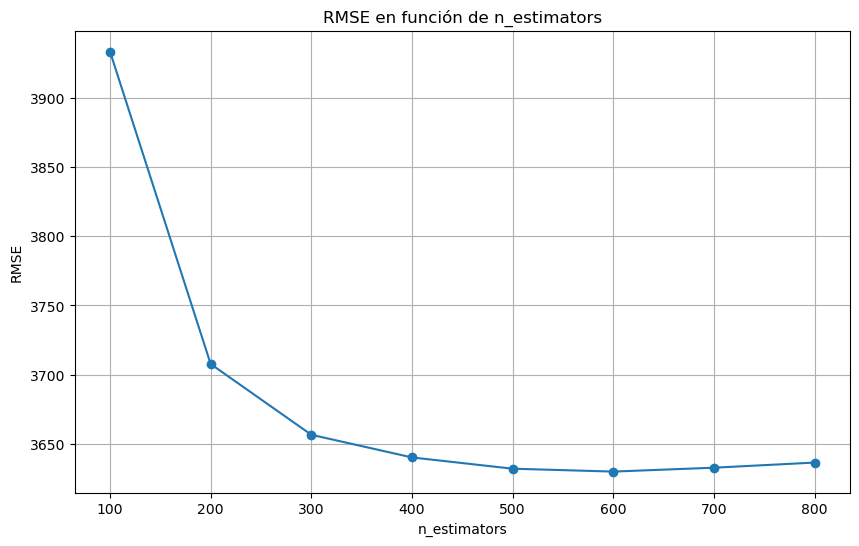

In [95]:
import matplotlib.pyplot as plt
import numpy as np
from xgboost import XGBRegressor
from sklearn import metrics

# Definir listas para almacenar los resultados
n_estimators_values = range(100, 801, 100)
rmse_values = []

# Iterar sobre diferentes valores de n_estimators
for n_estimators in n_estimators_values:
    # Entrenar el modelo XGBoost con el número de estimadores actual
    XGB_f = XGBRegressor(n_estimators=n_estimators, max_depth=7, learning_rate=0.2)
    XGB_f.fit(Xtrain_f, ytrain_f)
    
    # Realizar predicciones en el conjunto de validación
    y_pred_XGB_f = XGB_f.predict(Xval_f)
    
    # Calcular el RMSE y almacenarlo
    rmse = np.sqrt(metrics.mean_squared_error(yval_f, y_pred_XGB_f))
    rmse_values.append(rmse)

# Crear la gráfica
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_values, rmse_values, marker='o', linestyle='-')
plt.xlabel('n_estimators')
plt.ylabel('RMSE')
plt.title('RMSE en función de n_estimators')
plt.grid(True)
plt.show()


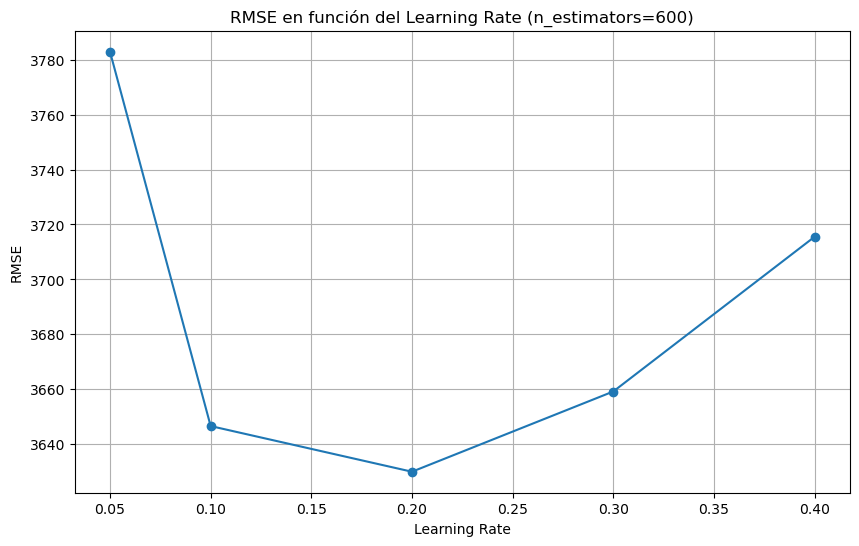

In [97]:
import matplotlib.pyplot as plt
import numpy as np
from xgboost import XGBRegressor
from sklearn import metrics

# Definir los valores de learning_rate a probar
learning_rates = [0.05, 0.1, 0.2, 0.3, 0.4]

# Definir el valor fijo de n_estimators
n_estimators = 600

# Listas para almacenar los resultados
rmse_values = []

# Iterar sobre diferentes valores de learning_rate
for lr in learning_rates:
    # Entrenar el modelo XGBoost con el learning_rate actual
    XGB_f = XGBRegressor(n_estimators=n_estimators, max_depth=7, learning_rate=lr)
    XGB_f.fit(Xtrain_f, ytrain_f)
    
    # Realizar predicciones en el conjunto de validación
    y_pred_XGB_f = XGB_f.predict(Xval_f)
    
    # Calcular el RMSE y almacenarlo
    rmse = np.sqrt(metrics.mean_squared_error(yval_f, y_pred_XGB_f))
    rmse_values.append(rmse)

# Crear la gráfica
plt.figure(figsize=(10, 6))
plt.plot(learning_rates, rmse_values, marker='o', linestyle='-')
plt.xlabel('Learning Rate')
plt.ylabel('RMSE')
plt.title(f'RMSE en función del Learning Rate (n_estimators={n_estimators})')
plt.grid(True)
plt.show()



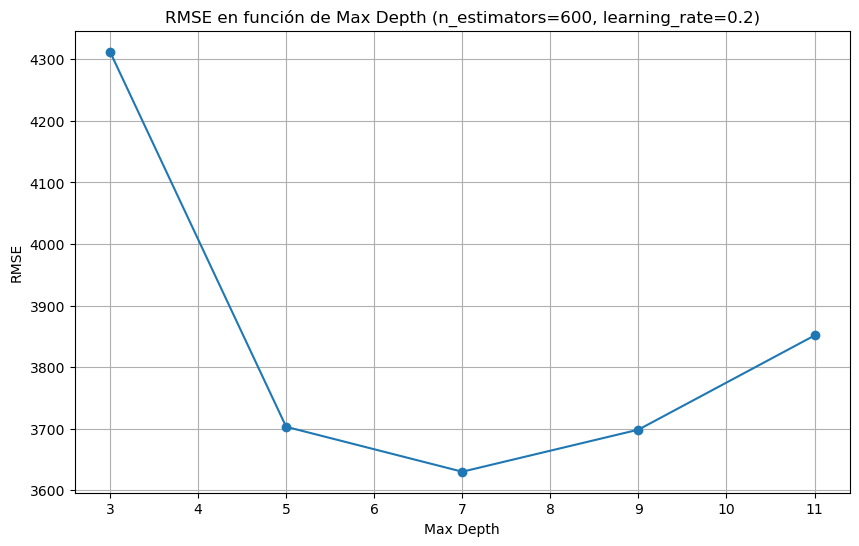

In [98]:
import matplotlib.pyplot as plt
import numpy as np
from xgboost import XGBRegressor
from sklearn import metrics

# Definir los valores de max_depth a probar
max_depth_values = [3, 5, 7, 9, 11]

# Definir los valores fijos de n_estimators y learning_rate
n_estimators = 600
learning_rate = 0.2

# Listas para almacenar los resultados
rmse_values = []

# Iterar sobre diferentes valores de max_depth
for max_depth in max_depth_values:
    # Entrenar el modelo XGBoost con el max_depth actual
    XGB_f = XGBRegressor(n_estimators=n_estimators, max_depth=max_depth, learning_rate=learning_rate)
    XGB_f.fit(Xtrain_f, ytrain_f)
    
    # Realizar predicciones en el conjunto de validación
    y_pred_XGB_f = XGB_f.predict(Xval_f)
    
    # Calcular el RMSE y almacenarlo
    rmse = np.sqrt(metrics.mean_squared_error(yval_f, y_pred_XGB_f))
    rmse_values.append(rmse)

# Crear la gráfica
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, rmse_values, marker='o', linestyle='-')
plt.xlabel('Max Depth')
plt.ylabel('RMSE')
plt.title(f'RMSE en función de Max Depth (n_estimators={n_estimators}, learning_rate={learning_rate})')
plt.grid(True)
plt.show()


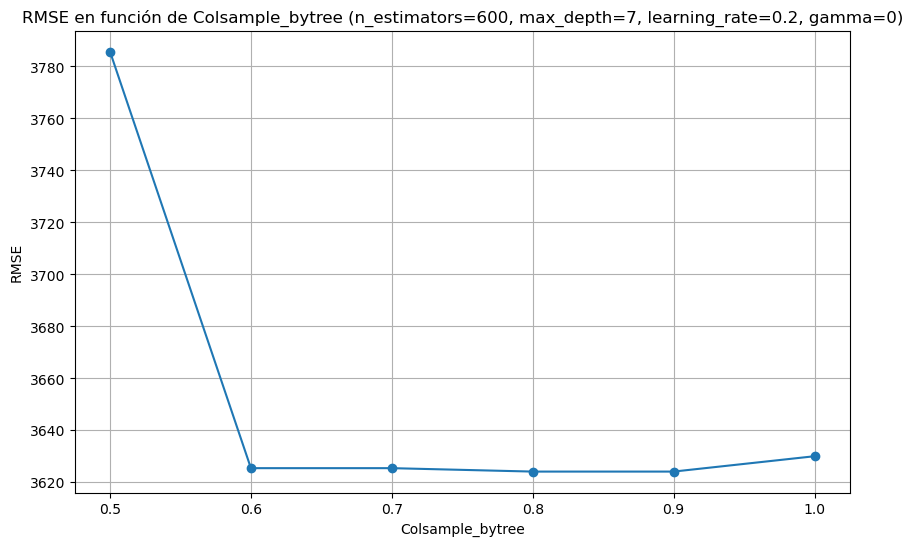

In [100]:
import matplotlib.pyplot as plt
import numpy as np
from xgboost import XGBRegressor
from sklearn import metrics

# Definir los valores de colsample_bytree a probar
colsample_bytree_values = [0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

# Definir los valores fijos de n_estimators, max_depth, learning_rate y gamma
n_estimators = 600
max_depth = 7
learning_rate = 0.2
gamma = 0

# Listas para almacenar los resultados
rmse_values = []

# Iterar sobre diferentes valores de colsample_bytree
for colsample_bytree in colsample_bytree_values:
    # Entrenar el modelo XGBoost con el colsample_bytree actual
    XGB_f = XGBRegressor(n_estimators=n_estimators, max_depth=max_depth, learning_rate=learning_rate, gamma=gamma, colsample_bytree=colsample_bytree)
    XGB_f.fit(Xtrain_f, ytrain_f)
    
    # Realizar predicciones en el conjunto de validación
    y_pred_XGB_f = XGB_f.predict(Xval_f)
    
    # Calcular el RMSE y almacenarlo
    rmse = np.sqrt(metrics.mean_squared_error(yval_f, y_pred_XGB_f))
    rmse_values.append(rmse)

# Crear la gráfica
plt.figure(figsize=(10, 6))
plt.plot(colsample_bytree_values, rmse_values, marker='o', linestyle='-')
plt.xlabel('Colsample_bytree')
plt.ylabel('RMSE')
plt.title(f'RMSE en función de Colsample_bytree (n_estimators={n_estimators}, max_depth={max_depth}, learning_rate={learning_rate}, gamma={gamma})')
plt.grid(True)
plt.show()


In [117]:
predicciones_xg_factorizado_kaggle=XGB_f.predict(data_test2_factorized)
predicciones_xg_factorizado_kaggle_file = pd.DataFrame({
    'ID': range(0, len(predicciones_xg_factorizado_kaggle) ),  # Números de observación empezando desde 1
    'Price': predicciones_xg_factorizado_kaggle  # Predicciones del año redondeadas
})
# Guardar el DataFrame en un archivo CSV sin incluir el índice de fila
predicciones_xg_factorizado_kaggle_file.to_csv('predicciones_xg_f_kaggle_file.csv', index=False)

print('Predicciones guardadas en predicciones_xg_f_kaggle_file.csv')

Predicciones guardadas en predicciones_xg_f_kaggle_file.csv


In [101]:
XGB3 = XGBRegressor(n_estimators=600, max_depth=7, learning_rate=0.2,colsample_bytree=0.9, gamma=0)
XGB3.fit(Xtrain_f, ytrain_f)
y_pred_XGB3 = XGB3.predict(Xval_f)

rmse_XGB3 = np.sqrt(metrics.mean_squared_error(yval_f,y_pred_XGB3))
mae_XGB3 = metrics.mean_absolute_error(yval_f, y_pred_XGB3)
r2_XGB3 = metrics.r2_score(yval_f, y_pred_XGB3)
print(f"Resultados del modelo XGBoosting:\nRMSE: {rmse_XGB3:.2f}, R^2: {r2_XGB3:.2f}, MAE: {mae_XGB3:.2f}")

Resultados del modelo XGBoosting:
RMSE: 3624.10, R^2: 0.89, MAE: 2290.25


In [102]:
predicciones_xg_factorizado2_kaggle=XGB3.predict(data_test2_factorized)
predicciones_xg_factorizado2_kaggle_file = pd.DataFrame({
    'ID': range(0, len(predicciones_xg_factorizado2_kaggle) ),  # Números de observación empezando desde 1
    'Price': predicciones_xg_factorizado2_kaggle  # Predicciones del año redondeadas
})
# Guardar el DataFrame en un archivo CSV sin incluir el índice de fila
predicciones_xg_factorizado2_kaggle_file.to_csv('predicciones_xg_f2_kaggle_file.csv', index=False)

print('Predicciones guardadas en predicciones_xg_f2_kaggle_file.csv')

Predicciones guardadas en predicciones_xg_f2_kaggle_file.csv


In [ ]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# Define el modelo
model_f = xgb.XGBRegressor()

# Define los hiperparámetros para la búsqueda en cuadrícula
param_grid_f = {
    'n_estimators': [200,300,400],
    'learning_rate': [0.1,0.2,0.25,0.3],
    'gamma': [0,0.1],
    'colsample_bytree': [0.7, 1.0],
    'max_depth': [7, 10, 13]}

# Realiza la búsqueda en cuadrícula
grid_search_f = GridSearchCV(estimator=model_f, param_grid=param_grid_f, cv=3,  verbose=2)
grid_search_f.fit(Xtrain_f, ytrain_f)

# Muestra los mejores hiperparámetros
print("Mejores hiperparámetros encontrados:")
print(grid_search_f.best_params_)

# Obtiene el mejor modelo
best_model_f = grid_search_f.best_estimator_

Fitting 3 folds for each of 144 candidates, totalling 432 fits
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=200; total time=   3.6s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=200; total time=   4.3s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=200; total time=   3.7s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=300; total time=   4.6s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=300; total time=   6.6s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=300; total time=   4.8s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=400; total time=   7.9s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=400; total time=   6.3s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_de

XGBoost calibrado pero aplicando factorize a las variables categóricas y escalando Year y Mileage.

In [118]:
#Escalando el año y el mileage

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Lista de características numéricas a escalar
numeric_features_to_scale = ['Year', 'Mileage']

# Lista de características numéricas que no necesitan escalar
numeric_features_no_scale = [col for col in Xtrain_f.columns if col not in numeric_features_to_scale]

# Definir transformador para características numéricas a escalar
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Definir transformador para características numéricas que no necesitan escalar
numeric_transformer_no_scale = 'passthrough'

# Definir preprocesador para todas las características
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features_to_scale),  # Escalar solo 'Year' y 'Mileage'
        ('num_no_scale', numeric_transformer_no_scale, numeric_features_no_scale)  # Mantener sin escalar las demás
    ]
)

# Aplicar las transformaciones al conjunto de entrenamiento
Xtrainf_escalado = preprocessor.fit_transform(Xtrain_f)
Xvalf_escalado = preprocessor.transform(Xval_f)


In [84]:
XGB4 = XGBRegressor(n_estimators=500, max_depth=7, learning_rate=0.2)
XGB4

XGB4.fit(Xtrainf_escalado, ytrain_f)

y_pred_XGB4 = XGB4.predict(Xvalf_escalado)


rmse_XGB4 = np.sqrt(metrics.mean_squared_error(yval_f, y_pred_XGB4))
mae_XGB4 = metrics.mean_absolute_error(yval_f, y_pred_XGB4)
r2_XGB4 = metrics.r2_score(yval_f, y_pred_XGB4)

print(f"Resultados del modelo XGBoosting:\nRMSE: {rmse_XGB4:.2f}, R^2: {r2_XGB4:.2f}, MAE: {mae_XGB4:.2f}")

NameError: name 'Xtrainf_escalado' is not defined

In [67]:
import numpy as np
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
random_forest_f = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_f.fit(Xtrain_f, ytrain_f)
y_pred_rf_f = random_forest_f.predict(Xval_f)

# Métricas de desempeño para el modelo Random Forest
rmse_rf_f = np.sqrt(mean_squared_error(yval_f, y_pred_rf_f))
r2_rf_f = r2_score(yval_f, y_pred_rf_f)
mae_rf_f = mean_absolute_error(yval_f, y_pred_rf_f)

print(f"Resultados del modelo Random Forest:\nRMSE: {rmse_rf_f:.2f}, R^2: {r2_rf_f:.2f}, MAE: {mae_rf_f:.2f}")

Resultados del modelo Random Forest:
RMSE: 3784.29, R^2: 0.88, MAE: 2371.24


In [68]:
import matplotlib.pyplot as plt

# Listas para almacenar los valores de n_estimators y RMSE
n_estimators_values = [10, 50, 100, 150, 200, 300, 400]
rmse_values = []

# Itera sobre los valores de n_estimators para obtener los RMSE
for n_estimators in n_estimators_values:
    # Calcula el RMSE para el modelo con el valor actual de n_estimators
    random_forest_model_calibrando = RandomForestRegressor(n_estimators=n_estimators, max_depth=None, random_state=42)
    random_forest_model_calibrando.fit(Xtrain_f, ytrain_f)
    y_pred_rf_calibrando = random_forest_model_calibrando.predict(Xval_f)
    rmse = np.sqrt(mean_squared_error(yval_f, y_pred_rf_calibrando))
    rmse_values.append(rmse)

# Crea el gráfico de líneas
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_values, rmse_values, marker='o', linestyle='-')
plt.xlabel('n_estimators')
plt.ylabel('RMSE')
plt.title('RMSE en función de n_estimators')
plt.xticks(n_estimators_values)
plt.grid(True)

plt.show()

KeyboardInterrupt: 

Iteración 1: max_depth = None
Iteración 2: max_depth = 1
Iteración 3: max_depth = 5
Iteración 4: max_depth = 10
Iteración 5: max_depth = 20
Iteración 6: max_depth = 50


TypeError: '<' not supported between instances of 'int' and 'NoneType'

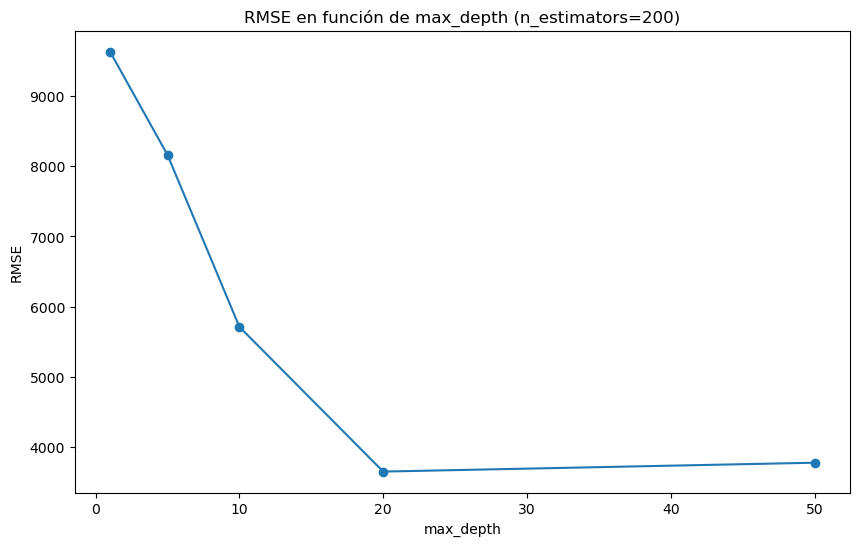

In [69]:
import matplotlib.pyplot as plt

# Listas para almacenar los valores de max_depth y RMSE
max_depth_values = [None, 1, 5, 10, 20, 50]
rmse_values = [] 

# Valor fijo de n_estimators
n_estimators = 200

# Itera sobre los valores de max_depth para obtener los RMSE
for i, max_depth in enumerate(max_depth_values):
    print(f"Iteración {i+1}: max_depth = {max_depth}")
    
    # Calcula el RMSE para el modelo con el valor actual de max_depth
    random_forest_model_calibrando = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
    random_forest_model_calibrando.fit(Xtrain_f, ytrain_f)
    y_pred_rf_calibrando = random_forest_model_calibrando.predict(Xval_f)
    rmse = np.sqrt(mean_squared_error(yval_f, y_pred_rf_calibrando))
    rmse_values.append(rmse)

# Crea el gráfico de líneas
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, rmse_values, marker='o', linestyle='-')
plt.xlabel('max_depth')
plt.ylabel('RMSE')
plt.title(f'RMSE en función de max_depth (n_estimators={n_estimators})')
plt.xticks(max_depth_values)

plt.show()



In [72]:
#Ahora entrenamos el modelo Random Forest con los mejores parámetros identificados
random_forest_model_calibrado = RandomForestRegressor(n_estimators=200, max_depth = 20, random_state=42)
random_forest_model_calibrado.fit(Xtrain_f, ytrain_f)
y_pred_rf_calibrado = random_forest_model_calibrado.predict(Xval_f)

# Métricas de desempeño para el modelo Random Forest
rmse_rf_calibrado = np.sqrt(mean_squared_error(yval_f, y_pred_rf_calibrado))
r2_rf_calibrado = r2_score(yval_f, y_pred_rf_calibrado)
mae_rf_calibrado = mean_absolute_error(yval_f, y_pred_rf_calibrado)
# Impresión de resultados
print(f"Resultados del modelo Random Forest:\nRMSE: {rmse_rf_calibrado:.2f}, R^2: {r2_rf_calibrado:.2f}, MAE: {mae_rf_calibrado:.2f}")

Resultados del modelo Random Forest:
RMSE: 3653.29, R^2: 0.88, MAE: 2304.27


In [74]:
predicciones_rf_factorizado_kaggle=random_forest_model_calibrado.predict(data_test2_factorized)
predicciones_rf_factorizado_kaggle_file = pd.DataFrame({
    'ID': range(0, len(predicciones_rf_factorizado_kaggle) ),  # Números de observación empezando desde 1
    'Price': predicciones_rf_factorizado_kaggle  # Predicciones del año redondeadas
})
# Guardar el DataFrame en un archivo CSV sin incluir el índice de fila
predicciones_rf_factorizado_kaggle_file.to_csv('predicciones_rf_f_kaggle_file.csv', index=False)

print('Predicciones guardadas en predicciones_rf_f_kaggle_file.csv')

Predicciones guardadas en predicciones_rf_f_kaggle_file.csv


In [73]:
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model.fit(Xtrain2, ytrain2)
y_pred_rf = random_forest_model.predict(Xval2)

# Métricas de desempeño para el modelo Random Forest
rmse_rf = np.sqrt(mean_squared_error(yval2, y_pred_rf))
r2_rf = r2_score(yval2, y_pred_rf)
mae_rf = mean_absolute_error(yval2, y_pred_rf)

print(f"Resultados del modelo Random Forest:\nRMSE: {rmse_rf:.2f}, R^2: {r2_rf:.2f}, MAE: {mae_rf:.2f}")

KeyboardInterrupt: 